In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from distfit import distfit


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data=pd.DataFrame(data)
data['class']=target
data.columns=column_names
data.info()
data.to_csv('data/feature-engine/boston.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
data=pd.read_csv('data/feature-engine/boston.csv')
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


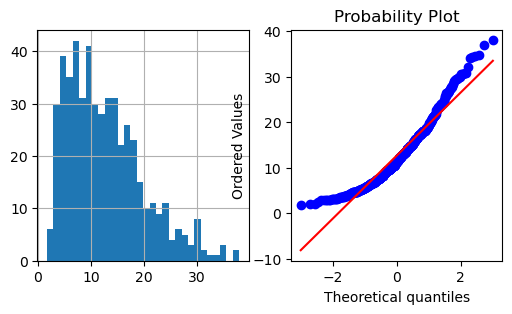

In [4]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(data,'LSTAT')

In [5]:
def dist_check(df,variable):
    dfit = distfit()
    results = dfit.fit_transform(df[variable].to_numpy())
    results['summary']
    dfit.plot(fontsize = 15,  figsize=(6,3))

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00150247] [loc=12.653 scale=7.134]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00393038] [loc=1.730 scale=10.923]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00393038] [loc=-1073741822.270 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.00100743] [loc=11.851 scale=6.118]
[distfit] >INFO> [t         ] [0.10 sec] [RSS: 0.00134872] [loc=12.214 scale=6.524]
[distfit] >INFO> [genextreme] [0.08 sec] [RSS: 0.000506226] [loc=9.162 scale=5.225]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.00020233] [loc=1.392 scale=4.876]
[distfit] >INFO> [lognorm   ] [0.03 sec] [RSS: 0.00040248] [loc=-1.734 scale=12.730]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 0.000132179] [loc=1.617 scale=60.197]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 0.00688187] [loc=1.730 scale=36.240]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.00151435] [loc=-2682.537 scale=348.144]
[dist

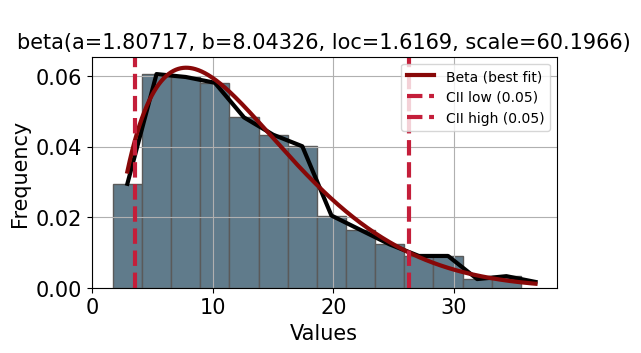

In [6]:
dist_check(data,'LSTAT')

In [7]:
x = np.linspace(0.1,2,5)
np.log(x)
np.reciprocal(x)
np.power(x,1/2)
np.power(x,1/3)

array([-2.30258509, -0.55338524,  0.04879016,  0.42199441,  0.69314718])

array([10.        ,  1.73913043,  0.95238095,  0.6557377 ,  0.5       ])

array([0.31622777, 0.75828754, 1.02469508, 1.2349089 , 1.41421356])

array([0.46415888, 0.83155175, 1.01639636, 1.15103876, 1.25992105])

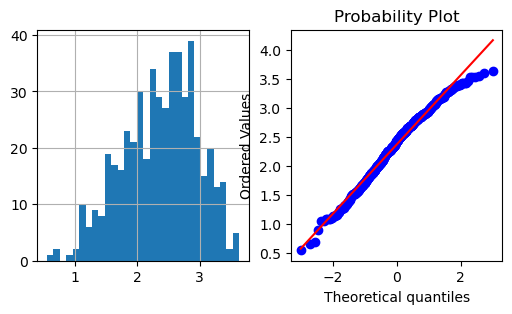

In [8]:
data_tf = data.copy()
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func = np.log)
data_tf['LSTAT']=transformer.transform(data_tf['LSTAT'])
diagnostic_plots(data_tf,'LSTAT')

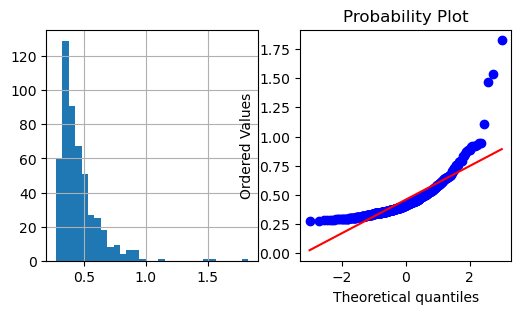

In [9]:
data_Tf = data.copy()
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func=np.reciprocal)
data_tf['LSTAT']=transformer.transform(data_tf['LSTAT'])
diagnostic_plots(data_tf,'LSTAT')

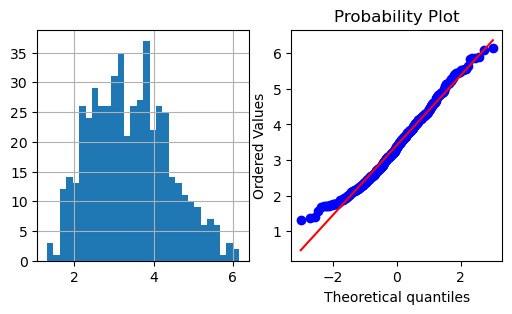

In [10]:
data_tf = data.copy()
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func=lambda x: np.power(x, 1/2))
data_tf['LSTAT'] = transformer.transform(data_tf['LSTAT'])
diagnostic_plots(data_tf,'LSTAT')

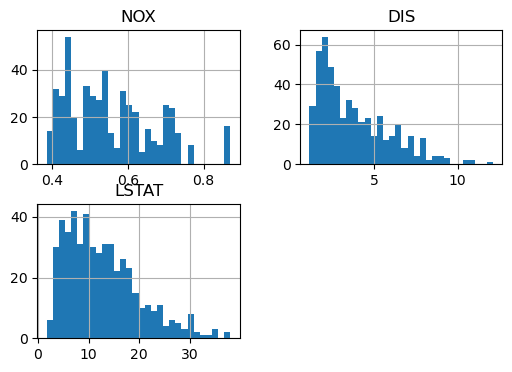

In [11]:
data[['NOX','DIS','LSTAT']].hist(bins=30, figsize=(6,4));

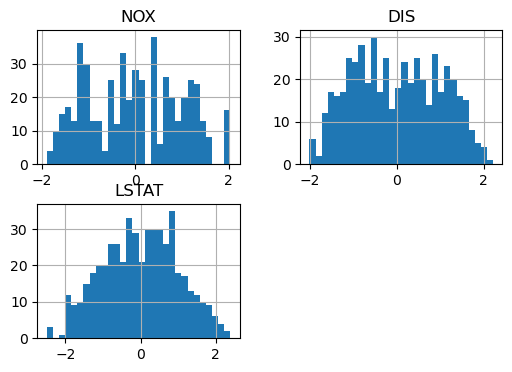

In [12]:
data_tf = data.copy()
data_tf = data_tf[['NOX','DIS','LSTAT']]
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
data_tf=transformer.fit_transform(data_tf)
data_tf.hist(bins=30, figsize=(6,4));

In [13]:
from scipy.stats import shapiro
from scipy.stats import normaltest

variable = data_tf[['LSTAT']]

stat, p = shapiro(variable)
print('Statistics = %.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fai to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

stat, p = normaltest(variable)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics = 0.991, p=0.005
Sample does not look Gaussian (reject H0)
Statistics=18.611, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(0)
data = pd.DataFrame({
    'feature0': np.random.exponential(scale=1, size=1000),
    'feature1': np.random.normal(loc=0, scale = 1, size = 1000),
    'target': np.random.randint(0, 2, size=1000)
})

X_train, X_test, y_train, y_test = train_test_split(data.drop('target',axis=1), data['target'], test_size=0.3, random_state=0)

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy default: ",accuracy)

X_train['log_feature0'] = np.log(X_train['feature0'] + 1)
X_test['log_feature0'] = np.log(X_test['feature0'] + 1)

mean = X_train['feature1'].mean()
std_dev = X_train['feature1'].std()
X_train['normal_probability_feature1'] = norm.cdf(X_train['feature1'],loc=mean, scale = std_dev)
X_test['normal_probability_feature1'] = norm.cdf(X_test['feature1'],loc=mean, scale= std_dev)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy with the engined data:",accuracy)

RandomForestClassifier(random_state=42)

Model accuracy default:  0.4533333333333333


RandomForestClassifier(random_state=42)

Model accuracy with the engined data: 0.4533333333333333


In [17]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(0)
data = pd.DataFrame({
    'feature0': np.random.exponential(scale=1, size=1000),
    'feature1': np.random.normal(loc=0, scale = 1, size = 1000),
    'target': np.random.randint(0, 2, size=1000)
})

X_train, X_test, y_train, y_test = train_test_split(data.drop('target',axis=1), data['target'], test_size=0.3, random_state=0)

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy default: ",accuracy)

X_train['log_feature0'] = np.log(X_train['feature0'] + 1)
X_test['log_feature0'] = np.log(X_test['feature0'] + 1)

mean = X_train['feature1'].mean()
std_dev = X_train['feature1'].std()
X_train['normal_probability_feature1'] = norm.cdf(X_train['feature1'],loc=mean, scale = std_dev)
X_test['normal_probability_feature1'] = norm.cdf(X_test['feature1'],loc=mean, scale= std_dev)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy with the engined data:",accuracy)

LogisticRegression(random_state=42)

Model accuracy default:  0.55


LogisticRegression(random_state=42)

Model accuracy with the engined data: 0.5366666666666666
